# Strojové učení s využitím regrese a klasifikace

## Úvod

Co je to strojové učení a rozdíl mezi klasifikací a regresí už jsme si říkali v minulé otázce. Zde si zkusíme nějaký model vytrénovat, ukážeme si metody ladění hyperparametrů a metriky pro měření kvality modelu.                     
Co si zde ale zmíníme je, že strojové učení lze ještě rozdělit na učení s učitelem a bez něj. Učení s učitelem je to, které budeme provádět my, známe cílovou proměnnou, můžeme model kontrolovat a ladit podle ní. V učení bez učitele cílovou proměnnou neznáme. Je to třeba hledání anomálií, nebo clustering (toho se využívá např. při zjišťování, co dále nabídnout zákazníkovy na základě toho, do jaké skupiny/clusteru patří). Ačkoliv je to velká část strojového učení, my se jí zde nebudeme zabývat. Je ale dobré o ní vědět.

**Potřebné knihovny**

In [1]:
!pip install ucimlrepo
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install joblib
!pip install matplotlib
!pip install seaborn
!pip install lightgbm
!pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **1** Regrese

## **2** Klasifikace

Klasifikaci si ukážeme na jednoduchém datasetu z knihovny ucimlrepo. V tomto datasetu se budeme snažit odhadnout stáří abalonu, to je jakási mušle. Většina proměnných je číselných, jedinou kategorickou převedu bez dalšího vysvětlování na číselné hodnoty. Zkusíme několik různých algoritmů, které si předtím popíšeme. Nakonec naše algoritmy zhodnotíme a porovnáme mezi sebou.

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder

In [6]:
data = fetch_ucirepo(id=1)

X = data.data.features
y = data.data.targets

df = pd.concat([X, y], axis=1, join="inner")
df

encoder = OneHotEncoder()
sex_encoded = encoder.fit_transform(df[['Sex']])
df = pd.concat([df.drop('Sex', axis=1), pd.DataFrame(data=sex_encoded.toarray(), columns=encoder.get_feature_names_out())], axis=1)

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


![Abalone](abalone.jpg)

Datová sada by neměla obsahovat ani prázdné hodnoty ani duplicitní řádky, takže o to se starat nemusíme. Cílovou proměnnou už máme také převedenou na čísla, všechny fíčury jsou také spojité reálné hodnoty. Později si tedy maximálně hodnoty normalizujeme či standardizujeme a podíváme se na ně pomocí grafu.                     
Ještě před tím, než se podíváme na jednotlivé modely k dispozici, musíme si datovou sadu rozdělit na trénovací, validační a testovací data.

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Podíváme se teď na různé modely pro klasifikaci a každý z nich si vytrénujeme, vyladíme pro něj hyperparametry a zhodnotíme si ho. Modely nakonec porovnáme mezi sebou.

### Trénování

#### Logistická regrese

#### Rozhodovací strom

Rozhodovací stromy jsou velmi oblíbeným algoritmem strojového učení. V dnešní době jsou v rámci klasického strojového učení algoritmy postavené na nich vlastně jediné, které se stále využívají a dovedou alespoň trochu konkurovat neuronovým sítím. My si zde vytrénujeme klasický rozhodovací strom, nicméně metody založené na gradient boostingu jsou dnes mnohem oblíbenější a účinnější.                
Jak rozhodovací strom funguje? Vytváří uzly. Každý z nich se jednoduše ptá, zde je nějaká fíčura větší či menší než nějaký treshold. Podle toho ji vyšle do pravého uzlu, či do levého uzlu. Jakmile dojde někam do listu, vybere nejčastější třídu, která zde při trénování spadla, a tu prohlásí za cílovou třídu tohoto listu.

![Decision Tree Classifier](decision_tree_classifier.jpg)

In [37]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
decisionTree_predictions = decisionTree.predict(X_test)

#### Náhodný les

Protože složitější algoritmy strojového učení nejsou deterministické, může při opakovaném spuštění vzniknout jiný strom. Toho se využívá v případě náhodného lesa, který je příkladem tzv. ensemble algoritmu. Tedy takového, který hodnotitelů vytvoří více a výstup je v tomto případě nejčastější hodnota, kterou stromy odhadovaly.

![Random Forest Classifier](random_forest_classifier.gif)

In [36]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
randomForest_predictions = randomForest.predict(X_test)

#### Support Vector Machine (SVM)

#### K nejbližších sousedů (KNN)

Algoritmus KNN funguje zhruba následovně. Při trénování si vytvoří mapku tránovacích dat v hyperprostoru. Když pak zařazuje nová data, prostě je do tohoto prostoru umístí a spočítá vzdálenost od přesně daného počtu bodů. Podle toho, ke které třídě je nejblíže, je zařazen.

![KNN](knn.jpg)

#### LightGBM

### Zhodnocení modelu

Máme spoustu metrik určených k hodnocení našeho modelu. Prvním z nich, ačkoliv to není tak úplně metrika, je tzv. konfuzní matice. Ta zobrazuje počty správně a špatně zařazených tříd. Zde je obrázek takové matice pro binární klasifikaci. Máme-li více tříd, pro každou v matici přibyde sloupec a řádek.

![Confusion Matrix](confusion_matrix.png)

Další klasickou metrikou je Accuracy (Přesnost). Tu lze z konfuzní matice spočítat následujícím způsobem:

![Accuracy](accuracy.png)

Tedy je to poměr mezi správně začleněnými třídami a všemi třídami. Dovede být dobrou metrikou, nicméně naráží na zásadní problém, nevyváženost tříd. Pokud bychom zkoumali jev, který je docela vzácný, a poměr našich tříd by byl třeba 1:10, model by mohl všechno zařadit do většinové třídy a stále by měl dobrou accuracy.                     
V takových případech se hodí jiná metrika, precision. Precision kouká na to, jak spolehlivě dovede náš model odhadnout správnou třídu. Ku příkladu, měli bychom dataset a rozhodovali bychom se, zda má dotyčný rakovinu nebo ne. Úplně nechceme na chemošku posílat někoho, kdo rakovinu nemá. Je tak pro nás důležitý precision, protože zohledňuje, jak je si model jistý tím, když o někom řekne, že rakovinu má.               
Velmi krásně by to bylo vidět např. u datasetu, kde by byly od druhé třídy jen 3 instance třeba ze 100. Náš model by vše zařadil do většinové třídy, jeho accuracy by bylo 97%, 97 ze 100 zařadil správně. Nicméně jeho precision bude 0%. Vzorec pro výpočet precisionu je zde:

![Precision](precision.png)

Existuje také metrika, které říkáme recall (citlivost modelu). Měří, kolik z instancí třídy model skutečně odhalil. Opět má stejný problém jako accuracy. Pokud náš model všechno zařadí do jedné třídy, recall může být 100%, náš model skutečně odhalil všechno. Ale to, že tam také zařadil všechno, už recall nezohledňuje. Recall chceme využít, je-li pro nás důležité, aby všechny instance byly opravdu odhaleny, ale v případě chyby se svět nezboří. Např. v bezpečnosti chceme raději vědět všechno, ačkoliv to může být planý poplach. Tady je vzoreček:

![Recall](recall.png)

Jak vidíme, jedna metrika nikdy nestačí. Proto je důležité, abychom využívali nejlépe všechn najednou. Existují metriky, které zohledňují i precision i recall zároveň. Třeba tzv. F1 score. To je harmonický průměr mezi recall a precision. Protože je prakticky těžko interpretovatelný, využívá se např. při porovnávání modelů. Zde vzorec:

![F1 Score](f1_score.jpg)

F score se dá i zobecnit podle toho, jakou zvolíme váhu. Je to tzv. f-beta score. F0.5 třeba znamená, že precision je 4x důležitější než recall. F2 to má naopak. Můžeme si tedy naše porovnávácí skóre upravovat dle našich potřeb.                        
Máme-li vícetřídní klasifikaci, můžeme si ještě vybírat mezi tzv. micro a macro metrikou, popř. weighted. Micro je v podstatě naše klasické F1 skóre (popř. jiná metrika, nezávisí na tom). Sečtou se všechny správně klasifikované a vydělí se to všemi klasifikovanými. Obojí nezávisle na třídě.

![Micro F1](f1_micro.jpg)

Macro už je trochu chytřejší. Spočítá danou metriku pro každou třídu a pak je zprůměruje.

![Macro F1](macro_f1.jpg)

Nakonec. Když chceme zohlednit i to, že naše třídy jsou nevyvážené, musíme jednotlivým třídám přidat váhu na základě jejich četnosti.

![Weighted F1](wighted_f1.jpg)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Logistická regrese

#### Rozhodovací strom

In [ ]:
accuracy_score(y_test, decisionTree_predictions)

0.2069377990430622

In [23]:
display(precision_score(y_test, decisionTree_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, decisionTree_predictions, average='macro', zero_division=0.0))
precision_score(y_test, decisionTree_predictions, average='weighted', zero_division=0.0)

0.2069377990430622

0.14188328887132085

0.20767083343018758

In [ ]:
display(recall_score(y_test, decisionTree_predictions, average='micro'))
display(recall_score(y_test, decisionTree_predictions, average='macro'))
recall_score(y_test, decisionTree_predictions, average='weighted')

0.2069377990430622

0.16399053460650703

0.2069377990430622

In [24]:
display(f1_score(y_test, decisionTree_predictions, average='micro'))
display(f1_score(y_test, decisionTree_predictions, average='macro'))
f1_score(y_test, decisionTree_predictions, average='weighted')

0.2069377990430622

0.1475438404617056

0.20499961358144034

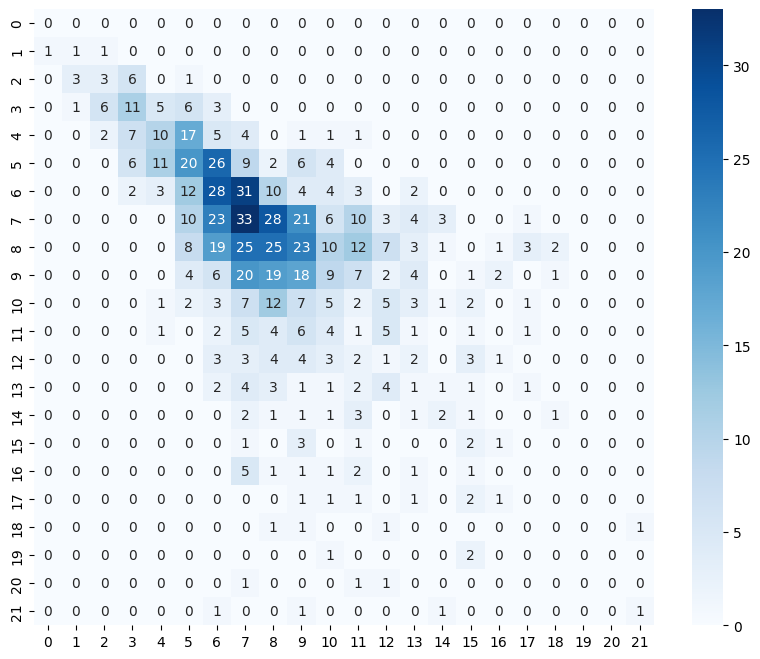

In [41]:
matrix = confusion_matrix(y_test, decisionTree_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

#### Náhodný les

In [29]:
accuracy_score(y_test, randomForest_predictions)

0.2607655502392344

In [30]:
display(precision_score(y_test, randomForest_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, randomForest_predictions, average='macro', zero_division=0.0))
precision_score(y_test, randomForest_predictions, average='weighted', zero_division=0.0)

0.2607655502392344

0.15347324527941192

0.24667924401912197

In [31]:
display(recall_score(y_test, randomForest_predictions, average='micro'))
display(recall_score(y_test, randomForest_predictions, average='macro'))
recall_score(y_test, randomForest_predictions, average='weighted')

0.2607655502392344

0.1526215084323243

0.2607655502392344

In [32]:
display(f1_score(y_test, randomForest_predictions, average='micro'))
display(f1_score(y_test, randomForest_predictions, average='macro'))
f1_score(y_test, randomForest_predictions, average='weighted')

0.2607655502392344

0.14778480506592945

0.24908738619693616

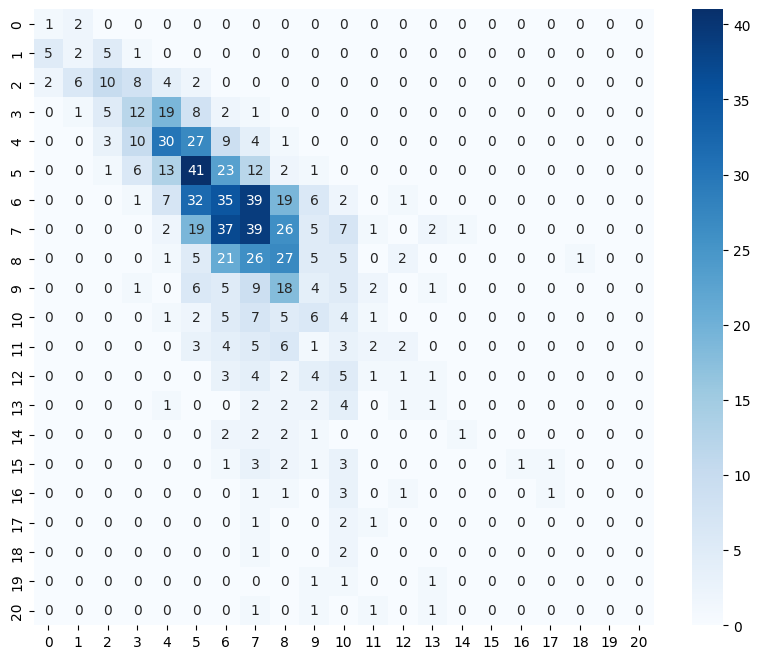

In [42]:
matrix = confusion_matrix(y_test, randomForest_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

#### Support Vector Machine (SVM)

#### K nejbližších sousedů (KNN)

#### LightGBM

### Ladění hyperparametrů

#### Logistická regrese

#### Rozhodovací strom

#### Náhodný les

#### Support Vector Machine (SVM)

#### K nejbližších sousedů (KNN)

#### LightGBM